# Modeling Clustering

In [111]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

## Clustering with the Iris Dataset

#### 1. Using this lesson as a guide, perform clustering on the iris dataset.

    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [6]:
# Import iris dataset (from seaborn because the column names are already nice)
df = sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


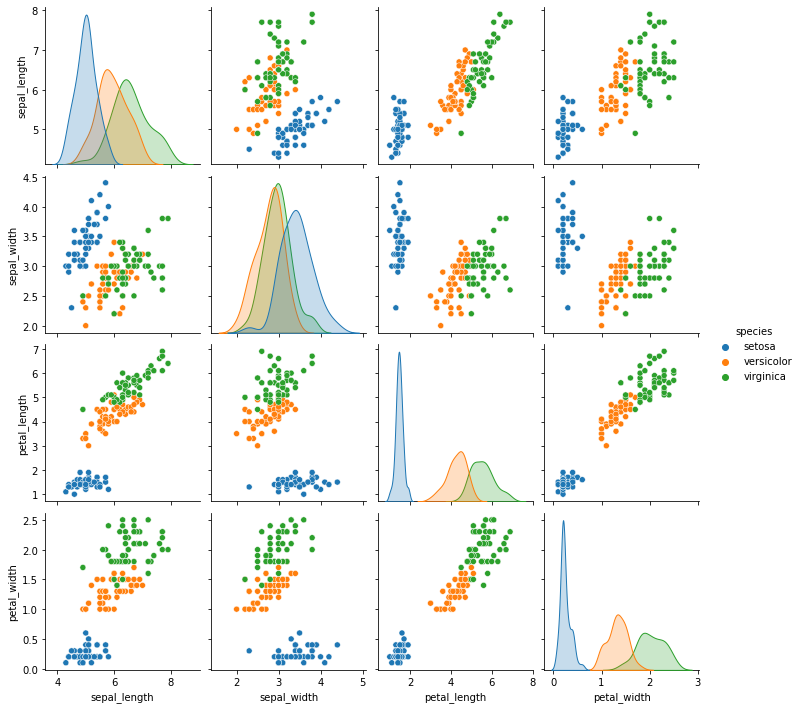

In [10]:
# Choose two features
sns.pairplot(data = df, hue = 'species')

# petal length and petal width

In [62]:
# choose selected features to go into X dataset (no train because I didn't split here)
X_df = df[['petal_width', 'petal_length']]

In [63]:
# scale the data using a standard scaler

standardscaler = StandardScaler().fit(X_df)

X_scaled = pd.DataFrame(standardscaler.transform(X_df), columns = X_df.columns).set_index([X_df.index.values])

In [64]:
X_scaled.head()

,petal_width,petal_length
0,-1.315444,-1.340227
1,-1.315444,-1.340227
2,-1.315444,-1.397064
3,-1.315444,-1.283389
4,-1.315444,-1.340227


In [65]:
# Define thing
kmeans = KMeans(n_clusters=3, random_state=713)

#Fit Thing
kmeans.fit(X_scaled)

#Use thing (using == predicting)

X_scaled['clusters'] = kmeans.predict(X_scaled)

In [66]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=['petal_width', 'petal_length'])
centroids_scaled

,petal_width,petal_length
0,1.127978,1.028000
1,-1.254893,-1.304987
2,0.165418,0.305873


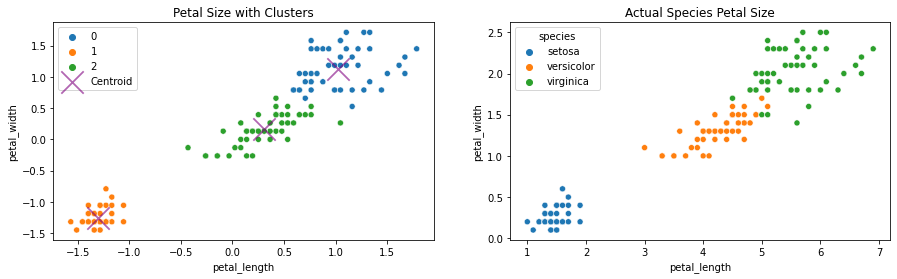

In [67]:
# plot scatters of actuals vs cluster predictions


plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = X_scaled, hue= 'clusters', palette='tab10')
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = centroids_scaled, color = 'purple',
               s = 500, marker = 'x', alpha = .6, label = 'Centroid')
plt.title('Petal Size with Clusters')


plt.subplot(1,2,2)
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue= 'species')
plt.title('Actual Species Petal Size')

plt.show()

In [68]:
kmeans.inertia_

18.02696261254406

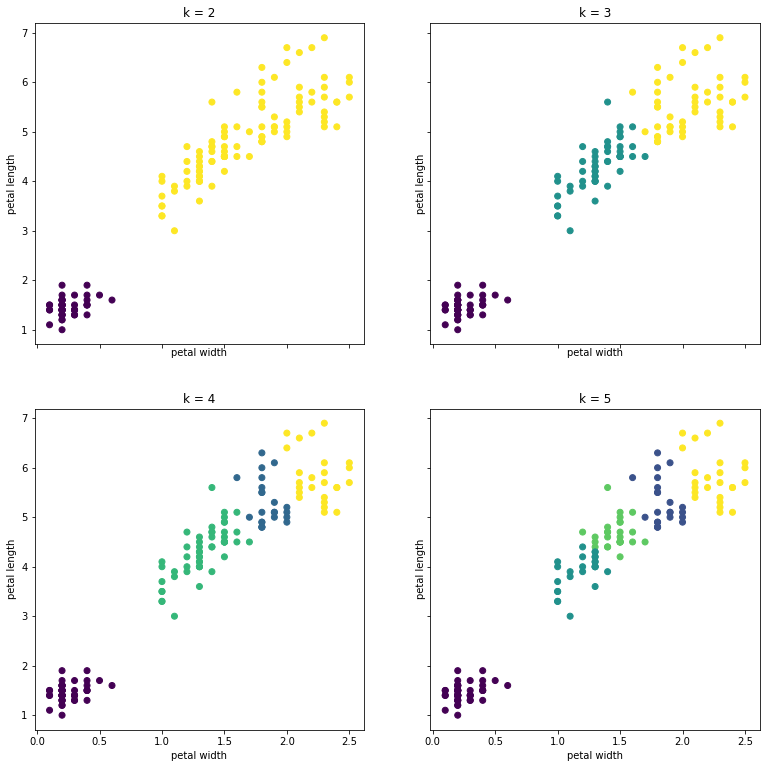

In [46]:
# plot the different ks to see how well they work

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_df.petal_width, X_df.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='petal length')

#### Takeaways
- K = 3 closely resembles the actuals. seems like the dots are actually in little clusters.
- K = 2 has 2 very clear clusters and the graph represents that
- K = 5 seems like there are lines drawn arbitrarily through the bigger group 
- k = 4 is meh but not as unclear as 5

In [75]:
# Repeat clustering with different features

X_df = df[['sepal_length', 'petal_length', 'petal_width']]


def scale_this(X_df, scalertype):
    '''
    X_df = dataframe with columns you need scaled
    scalertype = something like StandardScaler(), or MinMaxScaler()
    This function takes a dataframe (an X data), a scaler, and ouputs a new dataframe with those columns scaled. 
    And a scaler to inverse transforming
    '''
    scaler = scalertype.fit(X_df)

    X_scaled = pd.DataFrame(scaler.transform(X_df), columns = X_df.columns).set_index([X_df.index.values])
    
    return X_scaled, scaler


In [76]:
# use function to scale new features 
X_scaled2, scaler2 = scale_this(X_df, StandardScaler())

In [77]:
# Define thing
kmeans = KMeans(n_clusters=3, random_state=713)

#Fit Thing
kmeans.fit(X_scaled2)

#Use thing (using == predicting)

X_scaled2['clusters'] = kmeans.predict(X_scaled2)

In [78]:
centroids_scaled2 = pd.DataFrame(kmeans.cluster_centers_, columns=['sepal_length', 'petal_length', 'petal_width'])
centroids_scaled2

,sepal_length,petal_length,petal_width
0,-1.017097,-1.284504,-1.235433
1,0.028969,0.367836,0.307263
2,1.224190,1.077444,1.102093


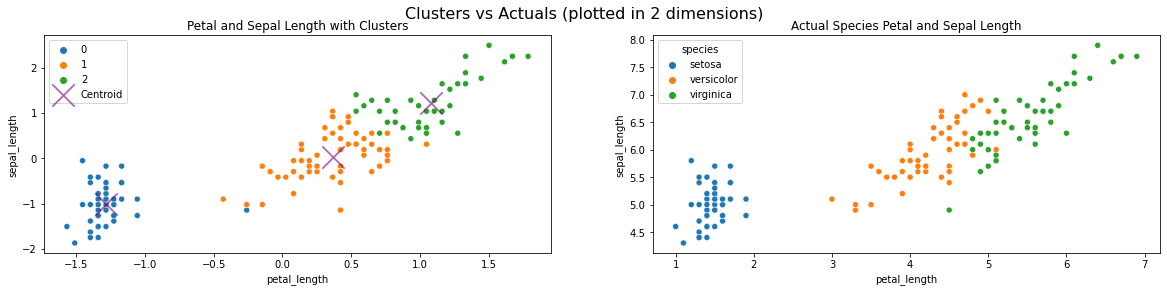

In [87]:
# plot scatters of actuals vs cluster predictions
# only use 2 dimensions eventhough kmeans is using 3 dimensions


plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = X_scaled2, hue= 'clusters', palette='tab10')
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = centroids_scaled2, color = 'purple',
               s = 500, marker = 'x', alpha = .6, label = 'Centroid')
plt.title('Petal and Sepal Length with Clusters')


plt.subplot(1,2,2)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = df, hue= 'species')
plt.title('Actual Species Petal and Sepal Length')
plt.suptitle('Clusters vs Actuals (plotted in 2 dimensions)', fontsize=16)

plt.show()

In [80]:
kmeans.inertia_

63.041199859571975

#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [47]:
# import wrangle so I can use my function to get the data
import wrangle as w

In [49]:
# import data
mall = w.get_any_data('mall_customers', 'Select * from customers')

In [50]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


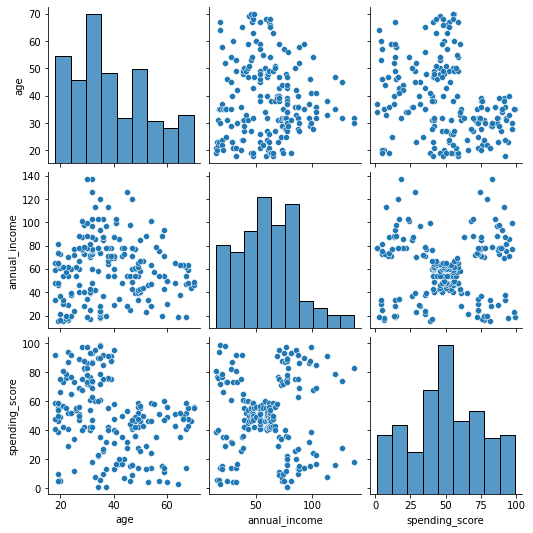

In [93]:
# pairplot to get overview
sns.pairplot(mall.drop(columns='customer_id'))

In [105]:
# Looking for clusters in spending score
# maybe with annual income? 

X_mall = mall[['annual_income', 'spending_score']]


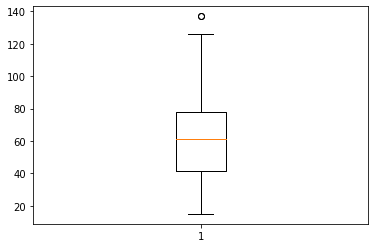

In [99]:
sns.(x = mall['annual_income'])
plt.show()

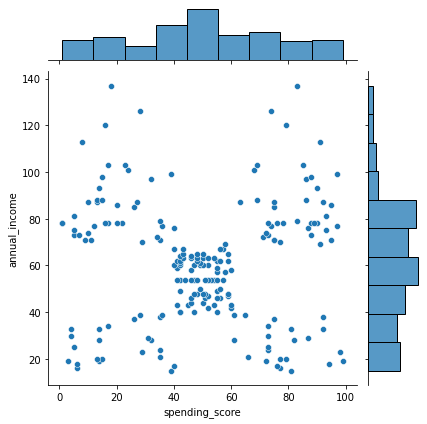

In [108]:
sns.jointplot(data = X_mall, x = 'spending_score', y = 'annual_income')

In [161]:
X_mall_scaled, mall_scaler = scale_this(X_mall, MinMaxScaler())

In [162]:
# Define thing
kmeans = KMeans(n_clusters=5, random_state=713)

#Fit Thing
kmeans.fit(X_mall_scaled)

#Use thing (using == predicting)

X_mall_scaled['clusters'] = kmeans.predict(X_mall_scaled)

In [115]:
centroids_mall = pd.DataFrame(kmeans.cluster_centers_, columns = X_mall.columns)
centroids_mall


,annual_income,spending_score
0,0.586381,0.827839
1,0.330298,0.495087
2,0.087928,0.799629
3,0.092659,0.203194
4,0.600000,0.164431


In [119]:
# change clusters from numbers to strings
X_mall_scaled['clusters'] = 'cluster_' + X_mall_scaled.clusters.astype('string')

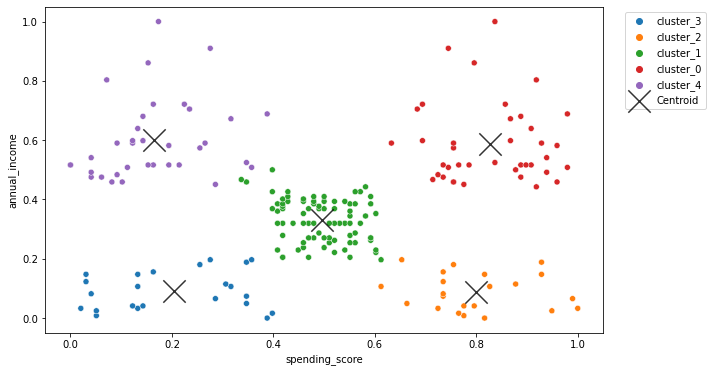

In [129]:
# Visualize clusters using anual income and spending score
plt.figure(figsize=(10,6))

# plot points with clusters in different colors
sns.scatterplot(data = X_mall_scaled, x = 'spending_score', y = 'annual_income', hue = 'clusters')

# plot centroid points
centroids_mall.plot.scatter(x = 'spending_score', y = 'annual_income', ax = plt.gca(), color = 'black',
               s = 500, marker = 'x', alpha = .8, label = 'Centroid')

# put legend outside plot
plt.legend(bbox_to_anchor= (1.03, 1))

plt.show()

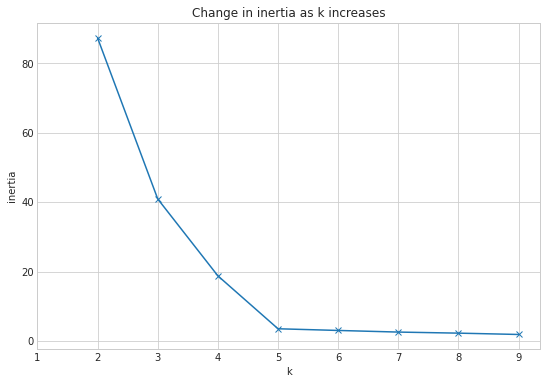

In [169]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_mall_scaled).inertia_ for k in range(2, 10)}).plot(marker='x')
    plt.xticks(range(1, 10))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

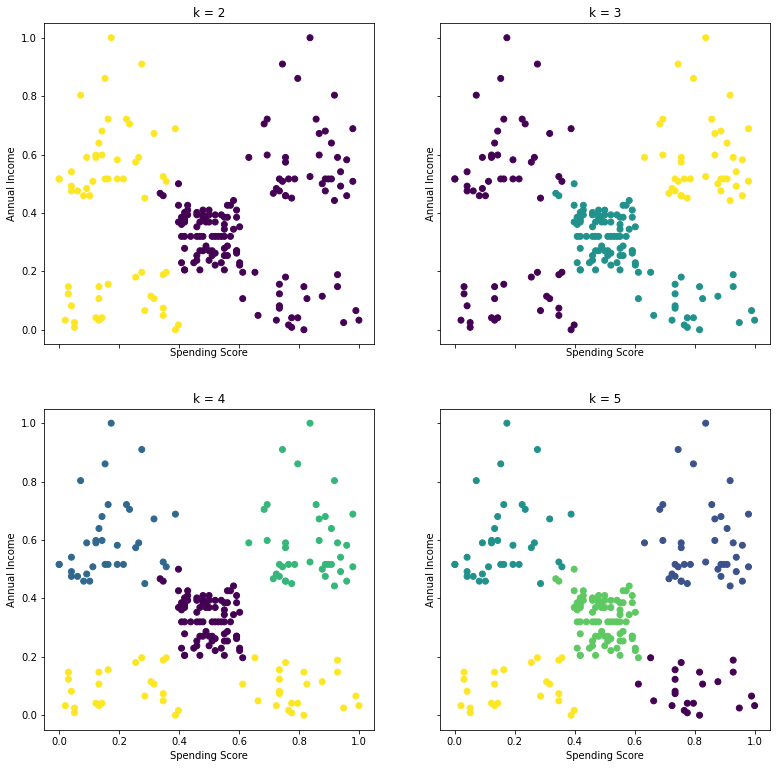

In [175]:
fig, axs = plt.subplots(2,2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_mall_scaled).predict(X_mall_scaled)
    ax.scatter(X_mall_scaled.spending_score, X_mall_scaled.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Spending Score', ylabel='Annual Income')

#### Takeaways
- K means was very good at putting theses clusters in apparent groups (evident from the visualization)
- From plotting viz at beginning, could see there were sort of 5 groupings, that's why I chose k = 5
- Not sure what to use with this information yet
- Inertia chart: Definitely don't want to go beyond 5 groups 

#### 3. How does scaling impact the results of clustering?
 - Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



#### Bonus
    a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
    b) Visualize the data and guess the number and shape of the clusters.
    c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
    d) Repeat the step above but with scaled data.
    c) Write down the takeaways from this exercise.

In [143]:
# assign link to variable (changing the edit&gid part to export?format=csv&gid)
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&gid=0'

#read into dataframe
df = pd.read_csv(sheet_url)


In [133]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='y'>

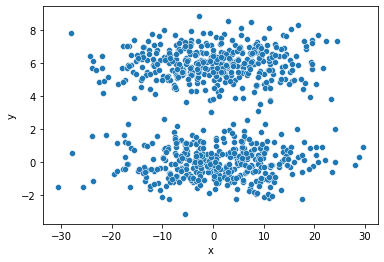

In [136]:
# visualize data
sns.scatterplot(data = df, x = 'x', y = 'y')

#### Size and shape of clusters
- appear to be two clusters
- they look like long horizontal ovals, one one oval higher and one lower

In [144]:
# Do k means without scaled data
# create kmeans

#define thing
kmeans = KMeans(n_clusters=2)

#fit thing
kmeans.fit(df)

#use thing
df['clusters'] = kmeans.predict(df)

# create centroids
centroids1 = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])


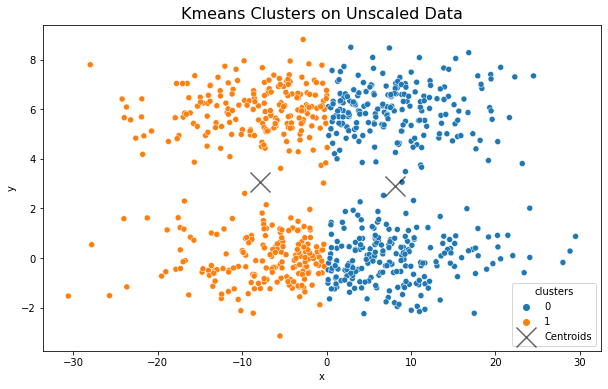

In [149]:
# visualize

plt.figure(figsize=(10,6))

# plot points with hue for clusters assigned by kmeans
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'clusters')

# plot centroids
centroids1.plot.scatter(x = 'x', y = 'y', ax = plt.gca(), marker = 'x',
                       s = 400, c = 'black', alpha = 0.6, label = 'Centroids')

plt.title("Kmeans Clusters on Unscaled Data", fontsize = 16)

plt.show()

#### Takeaways
- Algorithm doesn't catch what my eye does, the two obvious oblong groupings
- Must be some sort of issue with measuring distance. 
- X range is large and y range is small

In [151]:
# get data again to have clean data
df = pd.read_csv(sheet_url)

In [152]:
# do K means with scaled data
# create scaler
df_scaled, scaler = scale_this(df, MinMaxScaler())

In [156]:
# create kmeans
# Define thing
kmeans = KMeans(n_clusters=2)

# fit thing

kmeans.fit(df_scaled)

# use thing

#use thing
df_scaled['clusters'] = kmeans.predict(df_scaled)

# create centroids
centroids2 = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

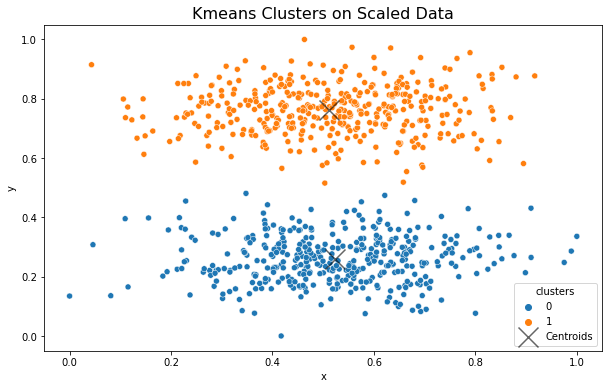

In [158]:
# visualize

plt.figure(figsize=(10,6))

# plot points with hue for clusters assigned by kmeans
sns.scatterplot(data = df_scaled, x = 'x', y = 'y', hue = 'clusters')

# plot centroids
centroids2.plot.scatter(x = 'x', y = 'y', ax = plt.gca(), marker = 'x',
                       s = 400, c = 'black', alpha = 0.6, label = 'Centroids')

plt.title("Kmeans Clusters on Scaled Data", fontsize = 16)

plt.show()

#### Takeaways
- With the data now scaled, clusters the algorithm assigns fit more with what makes sense visually
- This must be with distance calculation. 
- Used a Min Max scaler 
- Does data have to be scaled using the same scaler? 